In [17]:
!pip install yfinance

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf 

In [36]:
tick = yf.Ticker('^GSPC')
hist = tick.history(period="max", rounding=True)
hist = hist[:'2019-10-07']
hist = hist[-1000:]
h = hist.Close.tolist()

In [37]:
hs = hist.Close.loc[hist.Close.shift(-1) != hist.Close]
x = hs.rolling(window=3, center=True).aggregate(lambda x: x[0] > x[1] and x[2] > x[1])
minimaIdxs = [hist.index.get_loc(y) for y in x[x == 1].index]
x = hs.rolling(window=3, center=True).aggregate(lambda x: x[0] < x[1] and x[2] < x[1])
maximaIdxs = [hist.index.get_loc(y) for y in x[x == 1].index]

In [18]:
!pip install findiff

In [38]:
from findiff import FinDiff #pip install findiff
dx = 1 #1 day interval
d_dx = FinDiff(0, dx, 1)
d2_dx2 = FinDiff(0, dx, 2)
clarr = np.asarray(hist.Close)
mom = d_dx(clarr)
momacc = d2_dx2(clarr)

In [39]:
def get_extrema(isMin):
  return [x for x in range(len(mom))
    if (momacc[x] > 0 if isMin else momacc[x] < 0) and
      (mom[x] == 0 or #slope is 0
        (x != len(mom) - 1 and #check next day
          (mom[x] > 0 and mom[x+1] < 0 and
           h[x] >= h[x+1] or
           mom[x] < 0 and mom[x+1] > 0 and
           h[x] <= h[x+1]) or
         x != 0 and #check prior day
          (mom[x-1] > 0 and mom[x] < 0 and
           h[x-1] < h[x] or
           mom[x-1] < 0 and mom[x] > 0 and
           h[x-1] > h[x])))]
minimaIdxs, maximaIdxs = get_extrema(True), get_extrema(False)

In [7]:
conda install -c GregoryMorse trendln


UnavailableInvalidChannel: The channel is not accessible or is invalid.
  channel name: GregoryMorse
  channel url: https://conda.anaconda.org/GregoryMorse
  error code: 404

You will need to adjust your conda configuration to proceed.
Use `conda config --show channels` to view your configuration's current state,
and use `conda config --show-sources` to view config file locations.



Note: you may need to restart the kernel to use updated packages.


In [10]:
!pip install trendln --upgrade --no-cache-dir

  Created wheel for trendln: filename=trendln-0.1.10-py2.py3-none-any.whl size=19497 sha256=93150b6c166f671c5e5a14b787c22b36b4d8644611ecb0ddd3f232b2ebe54863
  Stored in directory: /private/var/folders/_4/q6rp_s8n7fsd_y4xtqdp0jt80000gn/T/pip-ephem-wheel-cache-hwtge10a/wheels/58/d7/5d/940142b1c7369d867dbbe2586d3300c21eb6f1e0af39108c3a
Successfully built trendln


In [13]:
import trendln
import matplotlib.pyplot as plt

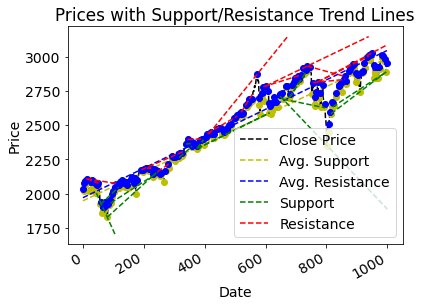

In [40]:
fig = trendln.plot_support_resistance(hist[-1000:].Close) # requires matplotlib - pip install matplotlib
plt.savefig('suppres.svg', format='svg')
plt.show()

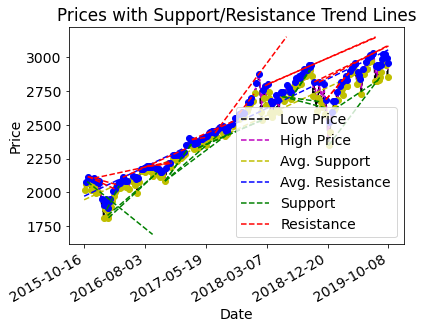

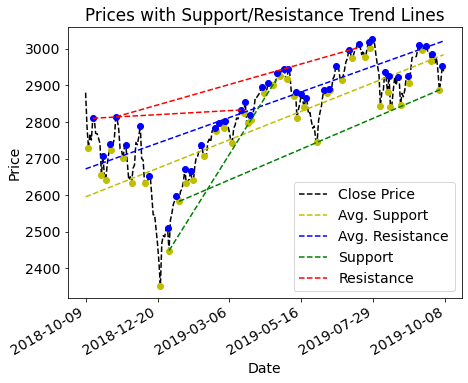

In [41]:
plt.clf() #clear figure
fig = trendln.plot_sup_res_date((hist[-1000:].Low, hist[-1000:].High), hist[-1000:].index) #requires pandas
plt.savefig('suppres.svg', format='svg')
plt.show()
plt.clf() #clear figure
curdir = '.'
trendln.plot_sup_res_learn(curdir, hist)

In [42]:
import findiff
coeff = findiff.coefficients(deriv=1, acc=1)
print(coeff)

{'center': {'coefficients': array([-0.5,  0. ,  0.5]), 'offsets': array([-1,  0,  1])}, 'forward': {'coefficients': array([-1.5,  2. , -0.5]), 'offsets': array([0, 1, 2])}, 'backward': {'coefficients': array([ 0.5, -2. ,  1.5]), 'offsets': array([-2, -1,  0])}}


In [47]:
 hist = hist[:'2019-10-07']

In [49]:
len(hist)

1000

In [56]:
# hist = hist[:'2019–10–07']
# subrract 1000 - 7
day = 993 # September 27, 2019 per example (-7 or 7th last point)
sum([coeff['center']['coefficients'][x] * hist.Close[day + coeff['center']['offsets'][x]]
     for x in range(len(coeff['center']['coefficients']))])

-0.44000000000005457

In [57]:
coeff=findiff.coefficients(deriv=2, acc=1)
print(coeff)

{'center': {'coefficients': array([ 1., -2.,  1.]), 'offsets': array([-1,  0,  1])}, 'forward': {'coefficients': array([ 2., -5.,  4., -1.]), 'offsets': array([0, 1, 2, 3])}, 'backward': {'coefficients': array([-1.,  4., -5.,  2.]), 'offsets': array([-3, -2, -1,  0])}}


In [59]:
# for acceleration
sum([coeff['center']['coefficients'][x] * hist.Close[day + coeff['center']['offsets'][x]]
     for x in range(len(coeff['center']['coefficients']))])

30.779999999999745

In [64]:
def get_bestfit3(x0, y0, x1, y1, x2, y2):
  xbar, ybar = (x0 + x1 + x2) / 3, (y0 + y1 + y2) / 3
  xb0, yb0, xb1, yb1, xb2, yb2 = x0-xbar, y0-ybar, x1-xbar, y1-ybar, x2-xbar, y2-ybar
  xs = xb0*xb0+xb1*xb1+xb2*xb2
  m = (xb0*yb0+xb1*yb1+xb2*yb2) / xs
  b = ybar - m * xbar
  ys0, ys1, ys2 = (y0 - (m * x0 + b)),(y1 - (m * x1 + b)),(y2 - (m * x2 + b))
  ys = ys0*ys0+ys1*ys1+ys2*ys2
  ser = np.sqrt(ys / xs)
  return m, b, ys, ser, ser * np.sqrt((x0*x0+x1*x1+x2*x2)/3)

In [106]:
def get_bestfit(pts):
  xbar, ybar = [sum(x) / len (x) for x in zip(*pts)]
  def subcalc(x, y):
    tx, ty = x - xbar, y - ybar
    return tx * ty, tx * tx, x * x
  (xy, xs, xx) = [sum(q) for q in zip(*[subcalc(x, y) for x, y in pts])]
  m = xy / xs
  b = ybar - m * xbar
  ys = sum([np.square(y - (m * x + b)) for x, y in pts])
  ser = np.sqrt(ys / ((len(pts) - 2) * xs))
  return m, b, ys, ser, ser * np.sqrt(xx / len(pts))

In [109]:
def get_trend_opt(Idxs):
  slopes, trend = [], []
  for x in range(len(Idxs)): #O(n^2*log n) algorithm
    slopes.append([])
    for y in range(x+1, len(Idxs)):
      slope = (h[Idxs[x]] - h[Idxs[y]]) / (Idxs[x] - Idxs[y])
      slopes[x].append((slope, y))
  for x in range(len(Idxs)):
    slopes[x].sort(key=lambda val: val[0])
    CurIdxs = [Idxs[x]]
    for y in range(0, len(slopes[x])):
      CurIdxs.append(Idxs[slopes[x][y][1]])
      if len(CurIdxs) < 3: continue
      res = get_bestfit([(p, h[p]) for p in CurIdxs])
      if res[3] <= fltpct:
        CurIdxs.sort()
        if len(CurIdxs) == 3:
          trend.append((CurIdxs, res))
          CurIdxs = list(CurIdxs)
        else: CurIdxs, trend[-1] = list(CurIdxs), (CurIdxs, res)
      else: CurIdxs = [CurIdxs[0], CurIdxs[-1]] #restart search
  return trend
mintrend, maxtrend = get_trend_opt(minimaIdxs), get_trend_opt(maximaIdxs)

In [113]:
# mintrend

In [73]:
scale = (hist.Close.max() - hist.Close.min()) / len(hist)

In [76]:
errpct=0.005
fltpct=scale*errpct

In [110]:
def get_trend(Idxs):
  trend = []
  for x in range(len(Idxs)):
    for y in range(x+1, len(Idxs)):
      for z in range(y+1, len(Idxs)):
        trend.append(([Idxs[x], Idxs[y], Idxs[z]],
          get_bestfit3(Idxs[x], h[Idxs[x]],
                       Idxs[y], h[Idxs[y]],
                       Idxs[z], h[Idxs[z]])))
  return list(filter(lambda val: val[1][3] <= fltpct, trend))
mintrend, maxtrend = get_trend(minimaIdxs), get_trend(maximaIdxs)

In [111]:
def measure_area(trendline, isMin):
  base = trendline[0][0]
  m, b, ser = trendline[1][0], trendline[1][1], h[base:trendline[0][-1]+1]
  return sum([max(0, (m * (x+base) + b) - y
               if isMin else y - (m * (x+base) + b))
              for x, y in enumerate(ser)]) / len(ser)
mintrend = [(pts, (res[0], res[1], res[2], res[3], res[4],
             measure_area((pts, res), True)))
            for pts, res in mintrend]
maxtrend = [(pts, (res[0], res[1], res[2], res[3], res[4],
             measure_area((pts, res), False)))
            for pts, res in maxtrend]
mintrend.sort(key=lambda val: val[1][5])
maxtrend.sort(key=lambda val: val[1][5])
print((mintrend[:5], maxtrend[:5]))

([([815, 911, 996], (1.6850989797162719, 1209.2768590707692, 0.003455989593917722, 0.00045904521220060485, 0.41788765996817634, 0.0002635736687197705)), ([612, 617, 802], (-1.2478550106609823, 3351.877842217485, 0.009907036247408886, 0.0006499806868513068, 0.44377341152641514, 0.0003733017783196712)), ([678, 682, 734], (3.3773975409836106, 409.7931830601069, 0.003246174863375302, 0.0012895733471628347, 0.9007230576570792, 0.0007314734924827798)), ([474, 477, 582], (1.1395625165212806, 1917.776887390959, 0.013018596352087125, 0.0013117434744071088, 0.6735301398846063, 0.000750387416426063)), ([498, 617, 782], (0.3091293980760718, 2390.9171772832306, 0.08003284852777914, 0.001402620256241873, 0.9018375605304206, 0.000806961767836599))], [([197, 202, 573], (1.8597984174425353, 1807.2053127486183, 0.00042032704754563704, 6.722325042849919e-05, 0.02478894768817597, 3.870841382332577e-05)), ([520, 535, 547], (3.5473770491803185, 749.7406557377099, 8.196721311907792e-05, 0.0004732379255777488

In [114]:
def make_image(Idxs):
  max_size = int(np.ceil(2/np.tan(np.pi / (360 * 5)))) #~1146
  m, tested_angles = hist.Close.min(), np.linspace(-np.pi / 2, np.pi / 2, 360*5)
  height = int((hist.Close.max() - m + 0.01) * 100)
  mx = min(max_size, height)
  scl = 100.0 * mx / height
  image = np.zeros((mx, len(hist))) #in rows, columns or y, x
  for x in Idxs:
    image[int((h[x] - m) * scl), x] = 255
  return image, tested_angles, scl, m

In [115]:
def hough_points(pts, width, height, thetas):
  diag_len = int(np.ceil(np.sqrt(width * width + height * height)))
  rhos = np.linspace(-diag_len, diag_len, diag_len * 2)
  # Cache some resuable values
  cos_t = np.cos(thetas)
  sin_t = np.sin(thetas)
  num_thetas = len(thetas)
  # Hough accumulator array of theta vs rho
  accumulator =np.zeros((2 * diag_len, num_thetas), dtype=np.uint64)
  # Vote in the hough accumulator
  for i in range(len(pts)):
    x, y = pts[i]
    for t_idx in range(num_thetas):
      # Calculate rho. diag_len is added for a positive index
      rho=int(round(x * cos_t[t_idx] + y * sin_t[t_idx])) + diag_len
      accumulator[rho, t_idx] += 1
  return accumulator, thetas, rhos

In [116]:
def find_line_pts(Idxs, x0, y0, x1, y1):
  s = (y0 - y1) / (x0 - x1)
  i, dnm = y0 - s * x0, np.sqrt(1 + s*s)
  dist = [(np.abs(i+s*x-h[x])/dnm, x) for x in Idxs]
  dist.sort(key=lambda val: val[0])
  pts, res = [], None
  for x in range(len(dist)):
    pts.append((dist[x][1], h[dist[x][1]]))
    if len(pts) < 3: continue
    r = get_bestfit(pts)
    if r[3] > fltpct:
      pts = pts[:-1]
      break
    res = r
  pts = [x for x, _ in pts]
  pts.sort()
  return pts, res

In [91]:
!pip install scikit-image

In [99]:
type(minimaIdxs[0])

int

In [117]:
def houghpt(Idxs):
  max_size = int(np.ceil(2/np.tan(np.pi / (360 * 5)))) #~1146
  m, tested_angles = hist.Close.min(), np.linspace(-np.pi / 2, np.pi / 2, 360*5)
  height = int((hist.Close.max() - m + 1) * 100)
  mx = min(max_size, height)
  scl = 100.0 * mx / height
  acc, theta, d = hough_points(
    [(x, int((h[x] - m) * scl)) for x in Idxs], mx, len(hist),
    np.linspace(-np.pi / 2, np.pi / 2, 360*5))
  origin, lines = np.array((0, len(hist))), []
  for x, y in np.argwhere(acc >= 3):
    dist, angle = d[x], theta[y]
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    y0, y1 = y0 / scl + m, y1 / scl + m
    pts, res = find_line_pts(Idxs, 0, y0, len(hist), y1)
    if len(pts) >= 3: lines.append((pts, res))
  return lines
mintrend, maxtrend = houghpt(minimaIdxs), houghpt(maximaIdxs)

def hough(Idxs): #pip install scikit-image
  image, tested_angles, scl, m = make_image(Idxs)
  from skimage.transform import hough_line, hough_line_peaks
  h, theta, d = hough_line(image, theta=tested_angles)
  origin, lines = np.array((0, image.shape[1])), []
  for pts, angle, dist in zip(*hough_line_peaks(h, theta, d, threshold=2)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    y0, y1 = y0 / scl + m, y1 / scl + m
    pts, res = find_line_pts(Idxs, 0, y0, image.shape[1], y1)
    if len(pts) >= 3: lines.append((pts, res))
  return lines
mintrend, maxtrend = hough(minimaIdxs), hough(maximaIdxs)

In [128]:
from skimage.transform import probabilistic_hough_line



In [129]:
def prob_hough(Idxs): #pip install scikit-image
  image, tested_angles, scl, m = make_image(Idxs)
  from skimage.transform import probabilistic_hough_line
  lines = []
  hough_prob_iter=10
  for x in range(hough_prob_iter):
    lines.append(probabilistic_hough_line(image, threshold=2,
                 theta=tested_angles, line_length=0,
      line_gap=int(np.ceil(np.sqrt(
        np.square(image.shape[0]) + np.square(image.shape[1]))))))
  l = []
  for (x0, y0), (x1, y1) in lines:
    if x0 == x1: continue
    if x1 < x0: (x0, y0), (x1, y1) = (x1, y1), (x0, y0)
    y0, y1 = y0 / scl + m, y1 / scl + m
    pts, res = find_line_pts(Idxs, x0, y0, x1, y1)
    if len(pts) >= 3: l.append((pts, res))
  return l
mintrend, maxtrend = prob_hough(minimaIdxs), prob_hough(maximaIdxs)

ValueError: too many values to unpack (expected 2)

In [131]:
def measure_area(trendline, isMin):
  base = trendline[0][0]
  m, b, ser = trendline[1][0], trendline[1][1], h[base:trendline[0][-1]+1]
  return sum([max(0, (m * (x+base) + b) - y
               if isMin else y - (m * (x+base) + b))
              for x, y in enumerate(ser)]) / len(ser)
mintrend = [(pts, (res[0], res[1], res[2], res[3], res[4],
             measure_area((pts, res), True)))
            for pts, res in mintrend]
maxtrend = [(pts, (res[0], res[1], res[2], res[3], res[4],
             measure_area((pts, res), False)))
            for pts, res in maxtrend]
mintrend.sort(key=lambda val: val[1][5])
maxtrend.sort(key=lambda val: val[1][5])
print((mintrend[:5], maxtrend[:5]))

([([815, 911, 996], (1.6850989797162719, 1209.2768590707692, 0.003455989593917722, 0.00045904521220060485, 0.41788765996817634, 0.0002635736687197705)), ([612, 617, 802], (-1.2478550106609823, 3351.877842217485, 0.009907036247408886, 0.0006499806868513068, 0.44377341152641514, 0.0003733017783196712)), ([85, 174, 266], (0.9248345745330233, 1839.3206161233877, 0.1333683636511335, 0.002853270528237525, 0.5420137663181425, 0.001638285208058393)), ([513, 525, 802], (-0.7688786987044406, 2967.762268538723, 0.5173779873313886, 0.0031107889081665083, 1.95262248152152, 0.0017898216589903062)), ([648, 657, 802], (-2.3383251528267373, 4226.420365668645, 0.1489564075674488, 0.0031575090689020526, 2.2287906500956716, 0.001811227493409763))], [([520, 535, 547], (3.5473770491803185, 749.7406557377099, 8.196721311907792e-05, 0.0004732379255777488, 0.25276310549162695, 0.00026346604217256493)), ([520, 535, 547], (3.5473770491803185, 749.7406557377099, 8.196721311907792e-05, 0.0004732379255777488, 0.252